
# Triedro ortornormal en una esfera

In [1]:
import sympy as sp
sp.init_printing(use_unicode=True)


![title](sphericalCoord.png)


 $$P  = (\sin{\phi}\, \cos \theta, \sin{\phi}\, \sin \theta,  \cos{\phi})$$ 
 
 $$P^{*} = (\cos{\phi}\, \cos \theta, \cos{\phi}\, \sin \theta,  -\sin{\phi})$$ 

## Matriz de rotación de un ángulo $\alpha$ alrededor del eje $P$ 

$P = (a,b,c)^T$

$$Rt(\alpha) = \cos{\alpha}\, I + \sin{\alpha}\left[ P\right]_{\times} + (1-\cos{\alpha})\, P\, P^{T}$$

$$ 
\left[ P\right]_{\times} = 
\begin{pmatrix} 
0 & -c & b\\
c & 0 & -a\\ 
-b & a & 0\\
\end{pmatrix}
$$

In [2]:
alpha, beta = sp.Symbol(r'\alpha'), sp.Symbol(r'\beta') 
theta, phi =  sp.Symbol(r'\theta'), sp.Symbol(r'\phi')

In [25]:
Id = sp.eye(3)
a,b, c = sp.symbols("a b c")
uu = sp.Matrix([a,b,c])
P = uu.subs([(a, sp.sin(phi)*sp.cos(theta)),(b, sp.sin(phi)*sp.sin(theta)), (c, sp.cos(phi)) ])
Ps = sp.simplify(P.subs(phi, phi + sp.pi/2))
rr  = sp.Matrix([[0,-c,b],[c,0,-a], [-b,a,0]]) 
R  = rr.subs([(a, sp.sin(phi)*sp.cos(theta)),(b, sp.sin(phi)*sp.sin(theta)), (c, sp.cos(phi)) ])
Rt = sp.cos(alpha)*Id +sp.sin(alpha)*R + (1-sp.cos(alpha))*(Ps*Ps.T)


## Parametrización del triedro de vectores ortogonales en una esfera

El triedro está parametrizado por la matrix $Q = Q(\theta, \phi, \alpha)$
$$ 
Q = \left(P, Rt(\alpha)\, P^{*}, P \times \left(Rt(\alpha)\, P^{*}\right)\right)
$$


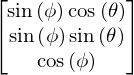

In [20]:
P

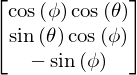

In [21]:
Ps

In [34]:
H = sp.cos(alpha)*Ps + sp.sin(alpha)*(P.cross(Ps))
K = sp.simplify(P.cross(H))

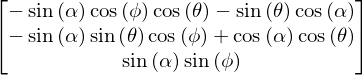

In [39]:
K

In [35]:
Q = sp.Matrix([[P[0],H[0], K[0]], [P[1],H[1], K[1]], [P[2],H[2], K[2]]])

In [36]:
sp.simplify(Q.det())

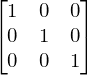

In [37]:
sp.simplify(Q*Q.T)